# **Importing Essential Python Modules**

Essential Python modules for image processing and analysis, such as TensorFlow for deep learning tasks and Keras for neural network model development, are imported into the given code. It illustrates the preliminary configuration needed to effectively handle picture input and define neural network architecture.

In [26]:
import pandas as pd
import numpy as np
import os
import warnings
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from keras.preprocessing.image import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input

warnings.filterwarnings('ignore')
%matplotlib inline


# **Load the Dataset**

This loads the UTKFace dataset and extracts picture paths, gender labels, and age labels from the given directory. The filenames are processed to extract age and gender information, with the first index signifying age and the second index representing gender. Gender labels are mapped for easier understanding in the final DataFrame, which arranges the data for additional analysis.

In [27]:
utk_img_folder = "/Users/vinay/Downloads/5218_project/archive/UTKFace"

In [28]:
# labels - age, gender, ethnicity
ages_info_list = []
img_info_list = []
genders_info_list = []

for filename in tqdm(os.listdir(utk_img_folder)):
    image_path = os.path.join(utk_img_folder, filename)
    temp = filename.split('_')
    age = int(temp[0])
    gender = int(temp[1])
    img_info_list.append(image_path)
    ages_info_list.append(age)
    genders_info_list.append(gender)

  0%|          | 0/23708 [00:00<?, ?it/s]

In [29]:
# convert to dataframe
data_frame = pd.DataFrame()
data_frame['main_gender_def'],  data_frame['main_age_def'], data_frame['main_image_path']  =  genders_info_list, ages_info_list, img_info_list
data_frame.head()

,main_gender_def,main_age_def,main_image_path
0,1,9,/Users/vinay/Downloads/5218_project/archive/UT...
1,0,36,/Users/vinay/Downloads/5218_project/archive/UT...
2,1,86,/Users/vinay/Downloads/5218_project/archive/UT...
3,1,26,/Users/vinay/Downloads/5218_project/archive/UT...
4,1,1,/Users/vinay/Downloads/5218_project/archive/UT...


In [30]:
# map labels for gender
main_lable_gender = {0:'MALE', 1:'FEMALE'}

# **Exploratory Data Analysis (EDA)**

With regard to the UTKFace dataset, this EDA offers insights through the sample face picture presentation, age distribution plot, and gender count plot. To maintain consistency, images are downsized to 128x128. The age distribution shows a peak at about 25–30 years old. The distribution of genders seems to be consistent. Furthermore, a grid of twenty-five randomly selected photographs is presented together with labels for age and gender, illustrating differences in both image quality and face features.

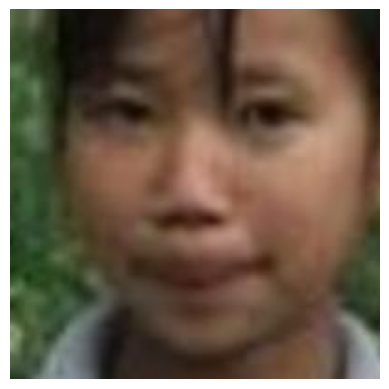

In [31]:
from PIL import Image
open_img = Image.open(data_frame['main_image_path'][0])
plt.axis('off')
plt.imshow(open_img);

<Axes: xlabel='main_age_def', ylabel='Density'>

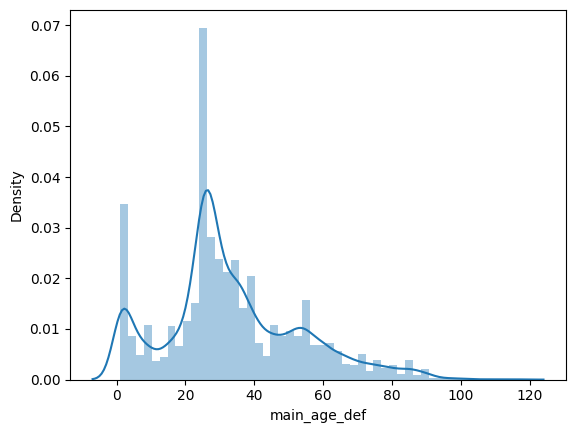

In [32]:
sns.distplot(data_frame['main_age_def'])


<Axes: ylabel='count'>

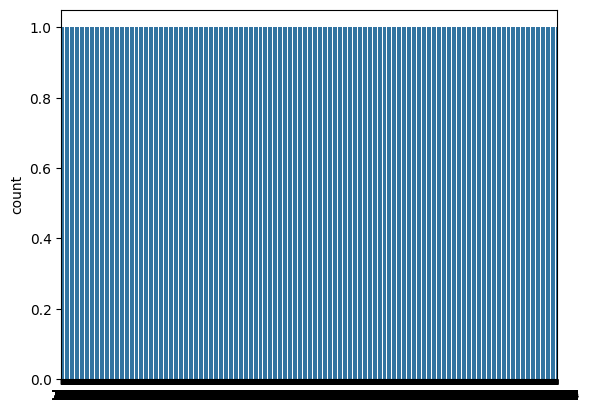

In [33]:
sns.countplot(data_frame['main_gender_def'])


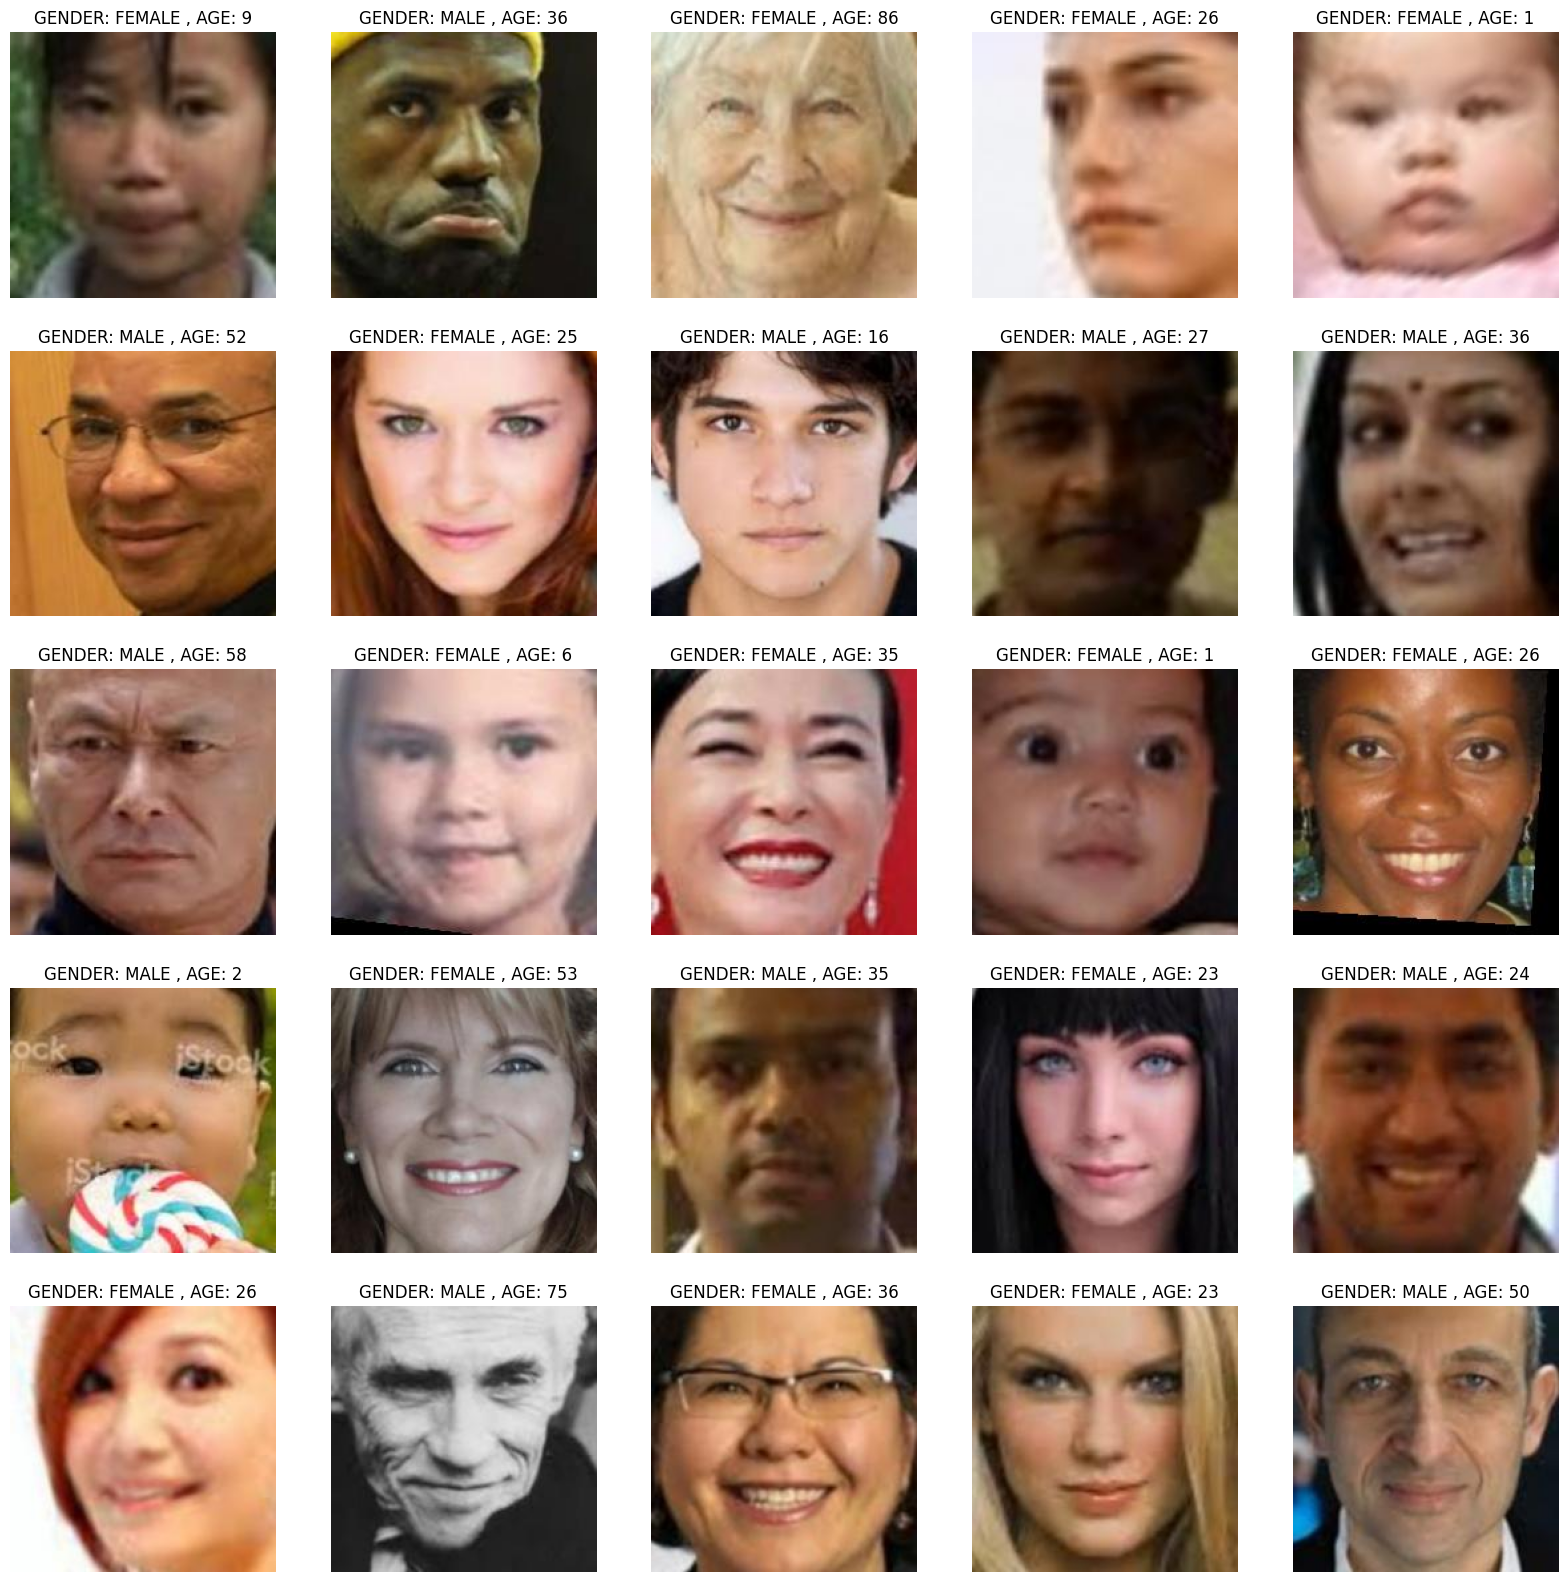

In [34]:
# to display grid of images
plt.figure(figsize=(20, 20))
files = data_frame.iloc[0:25]

for index, gender, age, file in files.itertuples():
    plt.subplot(5, 5, index+1)
    open_img = load_img(file)
    open_img = np.array(open_img)
    plt.imshow(open_img)
    plt.title(f"GENDER: {main_lable_gender[gender]} , AGE: {age}")
    plt.axis('off')

# **Feature Extraction and Data Preparation**

This indicates the feature extraction function to process photos for analysis. For efficiency, images are scaled to 128 by 128 pixels and turned to grayscale. The shape of the final feature array is (23708, 128, 128, 1). The photos are also adjusted to lie between [0, 1]. To preserve consistency, the input shape for the photos is set to (128, 128, 1) and the gender and age labels are translated to numpy arrays for modeling.

In [35]:
def extract_main_code_feature(images):
    main_code_extract = []
    for image in tqdm(images):
        open_img = load_img(image, color_mode='grayscale')
        open_img = open_img.resize((128, 128), Image.ANTIALIAS)
        open_img = np.array(open_img)
        main_code_extract.append(open_img)

    main_code_extract = np.array(main_code_extract)
    # ignore this step if using RGB
    main_code_extract = main_code_extract.reshape(len(main_code_extract), 128, 128, 1)
    return main_code_extract

In [36]:
main_img = extract_main_code_feature(data_frame['main_image_path'])
main_img.shape

  0%|          | 0/23708 [00:00<?, ?it/s]

(23708, 128, 128, 1)

In [37]:
# normalize the images
main_img = main_img/255.0

In [38]:
main_gender_def_value = np.array(data_frame['main_gender_def'])
main_age_def_value = np.array(data_frame['main_age_def'])

In [39]:
img_data_shape = (128, 128, 1)


# **Multi-Output Convolutional Neural Network for Gender and Age Prediction**

This model architecture predicts age and gender from input photos by using fully connected layers after convolutional layers. To avoid overfitting, dropout regularization is used, and the Adam optimizer dynamically modifies the learning rate. As the model is taught across a number of epochs, its accuracy increases throughout training and validation while its loss decreases, signifying effective learning and generalization.

In [40]:
input_shp = Input((img_data_shape))
# convolutional layers
conv_a = Conv2D(32, kernel_size=(3, 3), activation='relu') (input_shp)
maxp_a = MaxPooling2D(pool_size=(2, 2)) (conv_a)
conv_b = Conv2D(64, kernel_size=(3, 3), activation='relu') (maxp_a)
maxp_b = MaxPooling2D(pool_size=(2, 2)) (conv_b)
conv_c = Conv2D(128, kernel_size=(3, 3), activation='relu') (maxp_b)
maxp_c = MaxPooling2D(pool_size=(2, 2)) (conv_c)
conv_d = Conv2D(256, kernel_size=(3, 3), activation='relu') (maxp_c)
maxp_d = MaxPooling2D(pool_size=(2, 2)) (conv_d)

flatten = Flatten() (maxp_d)


In [41]:

# fully connected layers
dense_gender = Dense(256, activation='relu') (flatten)
dense_age = Dense(256, activation='relu') (flatten)

In [42]:
dropout_gender = Dropout(0.3) (dense_gender)
dropout_age = Dropout(0.3) (dense_age)

In [43]:

output_gender = Dense(1, activation='sigmoid', name='gender_out') (dropout_gender)
output_age = Dense(1, activation='relu', name='age_out') (dropout_age)

In [44]:
model = Model(inputs=[input_shp], outputs=[output_gender, output_age])
model.compile(loss=['binary_crossentropy', 'mae'], optimizer='adam', metrics=['accuracy', 'mae'])

In [45]:
# train model
train_history_model = model.fit(x=main_img, y=[main_gender_def_value, main_age_def_value], batch_size=32, epochs=30, validation_split=0.2)

Epoch 1/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 111s 182ms/step - age_out_mae: 16.4713 - gender_out_accuracy: 0.5079 - loss: 17.1975 - val_age_out_mae: 11.8080 - val_gender_out_accuracy: 0.7212 - val_loss: 12.3774
Epoch 2/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 103s 173ms/step - age_out_mae: 11.5114 - gender_out_accuracy: 0.7096 - loss: 12.0803 - val_age_out_mae: 10.0671 - val_gender_out_accuracy: 0.7718 - val_loss: 10.5452
Epoch 3/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 105s 178ms/step - age_out_mae: 9.7584 - gender_out_accuracy: 0.7764 - loss: 10.2460 - val_age_out_mae: 8.3741 - val_gender_out_accuracy: 0.8201 - val_loss: 8.7757
Epoch 4/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 106s 178ms/step - age_out_mae: 8.6270 - gender_out_accuracy: 0.7987 - loss: 9.0684 - val_age_out_mae: 7.9813 - val_gender_out_accuracy: 0.8334 - val_loss: 8.3483
Epoch 5/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 111s 188ms/step - age_out_mae: 8.0676 - gender_out_accuracy: 0.8163 - loss: 8.4671 - val_age_out_mae: 7.5527 - val_gender_out_accuracy: 0.8408 

# **Model Performance Visualization**

Plots of mean absolute error (MAE) for age prediction and training and validation accuracy and loss for gender prediction are shown. 90% gender accuracy is attained, and training and validation losses converge. The mean absolute error of 6.5 for age prediction indicates a little discrepancy between the expected and actual ages.

<Figure size 640x480 with 0 Axes>

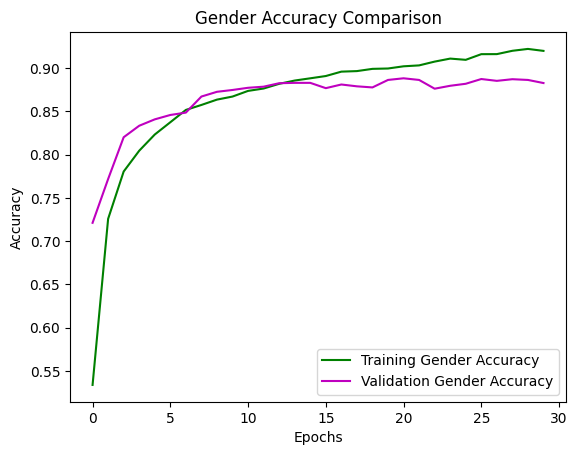

<Figure size 640x480 with 0 Axes>

In [46]:
# plot results for gender
gen_acc = train_history_model.history['gender_out_accuracy']
val_gen_acc = train_history_model.history['val_gender_out_accuracy']
epochs = range(len(gen_acc))

plt.plot(epochs, gen_acc, 'g', label='Training Gender Accuracy')
plt.plot(epochs, val_gen_acc, 'm', label='Validation Gender Accuracy')
plt.title('Gender Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()

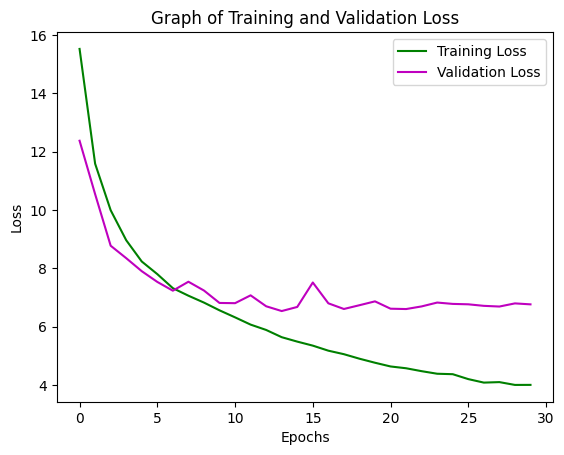

In [47]:
loss = train_history_model.history['loss']
val_loss = train_history_model.history['val_loss']

plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'm', label='Validation Loss')
plt.title('Graph of Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

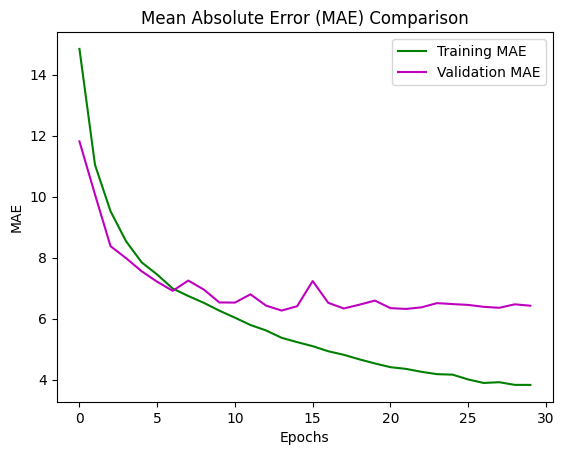

In [48]:
# plot results for age
age_out_mae = train_history_model.history['age_out_mae']
val_age_out_mae = train_history_model.history['val_age_out_mae']
epochs = range(len(loss))

plt.plot(epochs, age_out_mae, 'g', label='Training MAE')
plt.plot(epochs, val_age_out_mae, 'm', label='Validation MAE')
plt.title('Mean Absolute Error (MAE) Comparison')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

# **Prediction Results on Test Data**

The code snippet showcases predictions made by the model on test data. For the first sample image, the original gender is Female and the original age is 3, with the model predicting Female gender and age 1. Similarly, for the second and third sample images, predictions are made for gender and age, showing slight deviations from the original values, with a standard deviation of 4 observed for the predicted age attribute.

Gender and Age given as per the dataset/img: FEMALE  , 32
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
Gender and Age Predicted as per the model: FEMALE  , 31


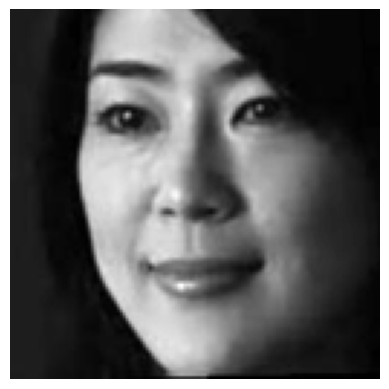

In [49]:
image_index = 100
print("Gender and Age given as per the dataset/img:", main_lable_gender[main_gender_def_value[image_index]], " ,", main_age_def_value[image_index])
# predict from model
pred_model = model.predict(main_img[image_index].reshape(1, 128, 128, 1))
gender_pred = main_lable_gender[round(pred_model[0][0][0])]
age_pred = round(pred_model[1][0][0])
print("Gender and Age Predicted as per the model:", gender_pred, " ,", age_pred)
plt.axis('off')
plt.imshow(main_img[image_index].reshape(128, 128), cmap='gray');

Gender and Age given as per the dataset/img: FEMALE  , 28
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Gender and Age Predicted as per the model: FEMALE  , 27


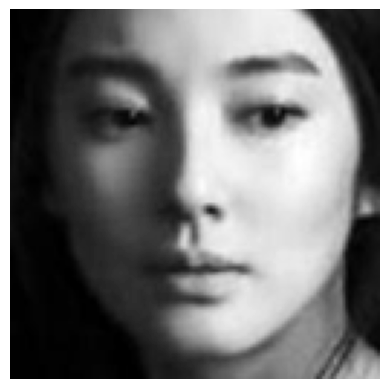

In [52]:
image_index = 3000
print("Gender and Age given as per the dataset/img:", main_lable_gender[main_gender_def_value[image_index]], " ,", main_age_def_value[image_index])
# predict from model
pred_model = model.predict(main_img[image_index].reshape(1, 128, 128, 1))
gender_pred = main_lable_gender[round(pred_model[0][0][0])]
age_pred = round(pred_model[1][0][0])
print("Gender and Age Predicted as per the model:", gender_pred, " ,", age_pred)
plt.axis('off')
plt.imshow(main_img[image_index].reshape(128, 128), cmap='gray');

Gender and Age given as per the dataset/img: FEMALE  , 48
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Gender and Age Predicted as per the model: FEMALE  , 46


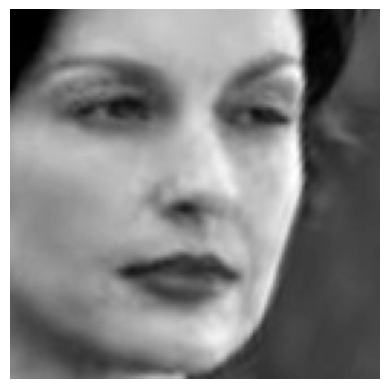

In [53]:
image_index = 10000
print("Gender and Age given as per the dataset/img:", main_lable_gender[main_gender_def_value[image_index]], " ,", main_age_def_value[image_index])
# predict from model
pred_model = model.predict(main_img[image_index].reshape(1, 128, 128, 1))
gender_pred = main_lable_gender[round(pred_model[0][0][0])]
age_pred = round(pred_model[1][0][0])
print("Gender and Age Predicted as per the model:", gender_pred, " ,", age_pred)
plt.axis('off')
plt.imshow(main_img[image_index].reshape(128, 128), cmap='gray');